In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib

y - distance in mm

s - meassurements from sensor

In [2]:
y = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
s = [
[425, 423, 421, 422, 422, 422, 492, 524, 421, 420, 421, 421, 421, 416, 421, 422, 421, 420, 422, 421, 422, 514, 432, 419, 420, 420, 421, 421, 416, 523, 422, 421, 421, 422, 421, 422, 520, 422, 420, 421, 421, 422, 421, 416, 524, 422, 421, 421, 422, 422, 422, 522, 422, 420, 422, 421, 422, 422, 416, 442, 421, 420, 421, 421, 421, 416, 521, 421, 420, 422, 421, 422, 421, 416, 442, 421, 420, 421, 421, 421, 420, 520, 424, 420, 421, 421, 422, 421, 422, 435, 422, 420, 421, 421, 421, 416, 522, 422, 420, 421, 421, 421, 421, 422, 432, 422, 421, 422, 421, 422, 416, 523, 423, 421, 421, 422, 421, 421, 512, 436, 421, 420, 422, 421, 422, 416, 522, 424, 420, 420, 421, 421, 421, 414, 523, 421, 420, 422, 421, 422, 421, 422, 428, 422, 421, 421, 422, 422, 416, 523, 423, 420, 421, 421, 422, 422, 422, 437, 422, 421, 422, 421, 422, 418, 522, 423, 420, 421, 421, 421, 421, 496, 523, 422, 420, 421, 420, 422, 420, 517, 425, 420, 420, 421, 420, 421, 416, 523, 422, 420, 421, 420, 422, 421, 422, 431, 422],
[394, 393, 393, 393, 394, 386, 493, 397, 392, 392, 393, 393, 393, 394, 386, 394, 398, 394, 392, 394, 393, 393, 393, 392, 493, 401, 393, 392, 393, 393, 393, 393, 394, 491, 394, 389, 394, 393, 393, 393, 393, 386, 491, 399, 393, 393, 393, 393, 393, 394, 388, 394, 401, 394, 392, 395, 393, 394, 394, 392, 493, 402, 393, 393, 393, 394, 394, 394, 395, 493, 395, 393, 395, 393, 394, 394, 394, 392, 488, 401, 393, 392, 393, 393, 393, 394, 394, 394, 413, 394, 392, 394, 393, 394, 393, 394, 482, 496, 393, 392, 393, 393, 394, 393, 395, 464, 394, 395, 395, 393, 394, 394, 394, 394, 386, 495, 398, 393, 393, 394, 390, 394, 394, 395, 495, 394, 392, 395, 393, 394, 393, 394, 384, 495, 395, 392, 393, 393, 393, 393, 394, 386, 394, 397, 394, 392, 393, 393, 394, 390, 388, 493, 402, 392, 392, 393, 393, 394, 394, 394, 489, 394, 393, 394, 392],
[371, 362, 472, 377, 369, 370, 370, 370, 372, 371, 371, 442, 371, 372, 370, 370, 370, 370, 370, 370, 370, 463, 390, 370, 369, 370, 370, 371, 370, 371, 360, 371, 375, 370, 369, 370, 370, 370, 370, 371, 459, 472, 370, 369, 371, 370, 371, 370, 371, 368, 465, 378, 370, 369, 370, 370, 371, 371, 371, 453, 472, 371, 370, 372, 370, 372, 371, 371, 368, 462, 381, 371, 369, 370, 370, 370, 370, 370, 360, 471, 371, 370, 371, 370, 371, 370, 371, 370, 442, 472, 373, 369, 370, 370, 371, 371, 371, 371, 465, 372, 371, 372, 370, 372, 371, 371, 371, 361, 473, 374, 369, 370, 370, 370, 370, 370, 370, 467, 371, 369, 371, 370, 371, 370, 371, 370, 360, 472, 373, 369, 369, 370, 370, 370, 370, 371, 460, 371, 370, 371, 370, 371, 370, 370, 370, 362, 471, 378, 369, 370, 370, 370, 371, 370, 371, 449, 371, 372, 371, 370, 371, 370, 371, 371, 368, 469, 382, 370, 370, 370, 370, 372, 371, 371, 360, 372, 374],
[342, 341, 341, 342, 342, 342, 342, 332, 342, 349, 342, 341, 342, 343, 343, 342, 342, 421, 443, 343, 341, 341, 342, 342, 342, 342, 340, 343, 357, 343, 341, 343, 342, 343, 342, 342, 336, 435, 350, 343, 341, 342, 342, 342, 343, 342, 343, 439, 343, 342, 343, 341, 342, 342, 342, 342, 330, 443, 347, 341, 342, 342, 342, 342, 341, 342, 328, 343, 345, 343, 341, 341, 341, 342, 342, 342, 416, 443, 343, 341, 342, 341, 343, 342, 342, 342, 343, 443, 345, 340, 341, 341, 342, 342, 342, 336, 430, 351, 342, 342, 341, 342, 344, 343, 342, 336, 439, 351, 341, 341, 341, 342, 342, 342, 342, 330, 342, 346, 343, 342, 343, 342, 343, 342, 343, 411, 443, 345, 341, 341, 342, 341, 342, 341, 344, 342, 415, 342, 340, 343, 342, 342, 342, 342, 332, 435, 349, 342, 341, 341, 342, 343, 342, 342, 342, 442, 343, 341, 343, 342, 344, 342, 343, 344, 411, 371, 344, 341, 341, 342, 342, 343, 342, 343, 430, 343],
[326, 323, 326, 322, 320, 415, 328, 322, 321, 326, 322, 326, 323, 323, 327, 427, 327, 326, 324, 327, 323, 323, 327, 327, 392, 428, 329, 325, 326, 322, 322, 323, 326, 327, 406, 327, 324, 327, 325, 326, 322, 326, 326, 324, 411, 349, 326, 321, 326, 322, 323, 326, 327, 320, 327, 338, 327, 325, 322, 326, 322, 322, 322, 308, 423, 327, 322, 323, 326, 327, 327, 323, 323, 327, 427, 327, 322, 326, 326, 326, 326, 326, 324, 404, 346, 324, 323, 325, 326, 326, 327, 326, 326, 413, 349, 323, 325, 326, 326, 322, 327, 323, 320, 327, 345, 323, 326, 327, 326, 323, 323, 327, 308, 423, 326, 326, 325, 322, 326, 322, 327, 322, 323, 423, 327, 325, 327, 326, 323, 322, 326, 320, 411, 336, 322, 325, 326, 326, 326, 327, 322, 327, 423, 327, 325, 323, 326, 327, 326, 322, 326, 308, 427, 326, 325, 326, 326, 327, 327, 327, 324, 410, 327, 323, 327, 321, 326, 326, 326, 326, 320, 415, 335, 325, 321, 326, 326, 327, 326, 323, 312, 323, 330, 326, 326],
[307, 307, 405, 307, 306, 308, 307, 307, 307, 307, 307, 370, 330, 309, 306, 306, 307, 307, 307, 307, 308, 399, 307, 306, 307, 306, 307, 306, 307, 306, 376, 329, 308, 306, 306, 306, 306, 307, 307, 307, 395, 307, 306, 306, 306, 306, 306, 307, 307, 296, 405, 313, 306, 306, 307, 307, 308, 307, 308, 376, 308, 309, 306, 306, 306, 306, 307, 306, 306, 395, 329, 307, 306, 307, 306, 307, 307, 307, 292, 399, 314, 307, 306, 306, 307, 307, 307, 307, 292, 406, 307, 306, 308, 306, 308, 307, 308, 307, 292, 407, 311, 306, 306, 306, 306, 307, 307, 304, 387, 307, 307, 307, 306, 307, 306, 307, 306, 304, 399, 316, 306, 305, 306, 306, 307, 306, 307, 292, 307, 310, 307, 306, 307, 306, 307, 307, 307, 390, 408, 307, 306, 307, 307, 307, 307, 307, 304, 308, 315, 307, 305, 307, 306, 306, 306, 307, 353, 406, 309, 306, 306, 306, 307, 306, 307, 307, 307, 407, 307, 306, 307, 307, 307, 307, 307, 296, 399, 313, 307, 306, 306, 307, 307, 308, 307, 307, 407, 308, 306, 306, 306, 307, 307, 307, 304, 389, 318, 307, 306, 306],
[291, 295, 291, 291, 295, 394, 291, 294, 291, 291, 295, 290, 291, 294, 363, 311, 292, 293, 290, 294, 291, 294, 290, 295, 387, 291, 290, 295, 290, 291, 295, 295, 295, 280, 391, 294, 290, 294, 294, 294, 295, 291, 295, 373, 291, 292, 296, 294, 291, 291, 291, 295, 280, 383, 298, 294, 294, 290, 295, 295, 291, 292, 354, 295, 297, 295, 290, 295, 290, 291, 294, 294, 372, 395, 291, 290, 294, 294, 291, 291, 296, 288, 296, 305, 296, 290, 290, 295, 291, 295, 295, 280, 387, 296, 295, 292, 295, 296, 295, 292, 295, 296, 395, 299, 294, 290, 294, 295, 295, 291, 288, 371, 307, 291, 295, 290, 291, 294, 295, 294, 288, 387, 305, 290, 294, 290, 295, 294, 295, 295, 280, 291, 295, 291, 290, 295, 294, 296, 295, 295, 367, 391, 296, 294, 290, 295, 295, 295, 291, 292, 295, 309, 291, 294, 296, 291, 295, 291, 295, 288, 383, 302, 295, 294, 291, 291, 295, 295, 295, 292, 383, 291, 294, 295, 290, 291, 290, 295, 288, 365, 311, 297, 290, 290, 290, 290, 295, 295, 291, 381, 291, 295, 295, 294, 295, 291, 291, 291, 280, 383, 297, 290, 294, 291, 291, 292, 291, 292, 353, 292, 297, 291, 294, 295, 295, 291, 295, 292, 385, 309, 295, 290, 291, 295, 292, 294, 291, 288, 295, 299, 291, 289, 294, 294, 291, 291, 291, 280, 391, 299, 290, 291, 294, 295, 290, 295, 294, 276, 394, 296, 290, 289, 291, 291, 291, 295, 292, 362, 291, 296, 295, 290, 291, 290, 295, 295, 294, 378, 319, 295, 290, 294, 295, 295, 291, 291, 288, 296, 303, 292, 290, 295, 295, 292, 291, 295, 278, 393, 297, 294, 290, 294, 294, 291, 295, 294, 295, 317, 295, 294, 295, 294, 291, 290, 291, 288, 376, 299, 295, 290, 291, 295, 295, 292, 295, 292, 391, 295, 295, 296, 295, 295, 295, 291, 291, 276, 395, 295, 290, 294, 295, 295, 295, 295, 291, 372, 295, 296, 294, 294, 291, 291, 295, 295, 290, 383, 311, 290, 294, 295, 294, 295, 291, 291, 280, 295, 299, 294, 290, 290, 294, 291, 294, 295, 372, 395, 292, 294, 291, 290, 291, 290, 295, 292, 376, 307, 296, 294, 294, 295, 291, 295, 295, 276, 383, 295, 295, 296, 295, 296, 291, 296, 295, 276, 394, 302, 290, 294, 294, 291, 295, 291, 291, 280, 291, 298, 295, 294, 295, 290, 295, 295, 295, 368, 395, 292, 294, 290, 290, 295, 294, 295, 290, 295, 309, 295, 290, 296, 295, 291, 291, 295, 288, 379, 303, 291, 290, 291, 295, 295, 296, 295, 296, 383, 292, 291, 296, 294, 295, 291, 291, 295, 280, 391, 295, 294],
[282, 282, 282, 283, 283, 282, 283, 298, 284, 282, 284, 283, 283, 283, 283, 272, 367, 293, 284, 282, 283, 283, 283, 283, 283, 284, 371, 284, 283, 284, 282, 283, 283, 283, 283, 272, 375, 292, 282, 282, 282, 283, 283, 283, 283, 268, 283, 287, 283, 282, 283, 283, 283, 283, 283, 346, 382, 285, 282, 284, 283, 284, 283, 284, 284, 284, 307, 285, 282, 282, 283, 283, 283, 283, 268, 375, 289, 283, 284, 283, 284, 283, 283, 283, 272, 381, 289, 282, 282, 282, 283, 283, 282, 283, 265, 283, 286, 283, 282, 283, 283, 283, 283, 282, 365, 379, 283, 282, 282, 282, 283, 283, 283, 272, 283, 291, 283, 282, 284, 282, 284, 283, 283, 266, 381, 287, 282, 282, 283, 283, 283, 283, 283, 284, 383, 284, 282, 284, 283, 284, 283, 283, 283, 345, 383, 285, 282, 277, 282, 283, 283, 283, 283, 360, 284, 284, 284, 282, 283, 283, 283, 283, 282, 369, 309, 283, 282, 282, 283, 284, 283, 284, 280, 284, 292, 284, 282, 283, 283, 283, 283, 283, 272, 375, 289, 283, 283, 283, 284, 283, 284, 283, 284, 383, 287, 282, 282, 283, 283, 283, 283, 280, 364, 295, 284, 283, 282, 283, 283, 283, 283, 280, 371, 293, 283, 282, 282, 282, 282, 283, 283, 268, 283, 289, 283, 282, 283, 283, 284, 283, 283, 357, 383, 284, 282, 282, 282, 283, 282, 283, 282, 283, 309, 283, 282, 284, 283, 284, 283, 284, 280, 366, 291, 283, 282, 283, 283, 283, 283, 283, 283, 379, 284, 282, 284, 283, 283, 283, 283, 283, 266, 383, 286, 282, 282, 283, 283, 283, 283, 283, 368, 284, 283, 284, 282, 283, 283, 283, 283, 272, 379, 291, 282, 282, 283, 283, 284, 283, 284, 272, 284, 289, 284, 283, 283, 283, 283, 283],
[271, 270, 271, 270, 270, 256, 359, 275, 270, 269, 270, 270, 270, 271, 270, 271, 370, 270, 269, 270, 270, 270, 270, 270, 270, 329, 371, 272, 269, 269, 270, 269, 271, 270, 270, 361, 271, 270, 269, 269, 269, 270, 270, 270, 260, 359, 281, 269, 269, 271, 270, 270, 270, 271, 256, 367, 275, 270, 269, 269, 270, 270, 271, 270, 256, 367, 271, 269, 271, 270, 271, 270, 271, 270, 256, 371, 274, 269, 270, 270, 270, 270, 270, 270, 332, 271, 271, 271, 269, 270, 270, 271, 270, 270, 346, 370, 271, 269, 269, 270, 270, 270, 270, 270, 271, 371, 271, 269, 271, 270, 271, 270, 270, 256, 354, 279, 271, 269, 270, 270, 270, 271, 270, 271, 359, 271, 270, 271, 270, 271, 270, 271, 270, 256, 367, 277, 269, 269, 270, 270, 271, 270, 271, 256, 270, 273, 270, 269, 270, 270, 270, 270, 268, 355, 287, 270, 269, 270, 270, 271, 270, 271, 264, 271, 279, 270, 269, 270, 269, 270, 270, 270, 256, 367, 273, 269, 271, 270, 270, 270, 271, 270, 256, 370, 274, 269, 269, 270, 270, 270, 270, 268, 346, 270, 272, 271, 269, 271, 270, 271, 270, 268, 353, 289, 270, 269, 269, 269, 270, 270, 270, 256, 271, 279, 271, 269, 270, 270, 271, 270, 270, 256, 367, 273, 269, 269, 270, 270, 270, 270, 270, 271, 370, 270, 269, 271, 270, 271, 270, 270, 268, 350, 279, 271, 269, 270, 270, 270, 270, 270, 271, 359, 271, 270, 271, 270, 270, 270, 271, 270, 256, 369, 273, 269, 269, 270, 270, 270, 270, 270, 343, 271, 271, 270, 269, 270, 270, 270, 270, 268, 359, 280, 269, 269, 270, 270, 271, 270, 271, 256, 271, 276, 270, 269, 270, 270, 270, 270, 270, 336, 367, 272, 269, 271, 270, 270, 270, 271, 270, 344],
[258, 262, 259, 257, 258, 258, 259, 258, 258, 339, 281, 258, 257, 257, 258, 258, 258, 258, 256, 258, 266, 259, 257, 258, 257, 258, 258, 258, 240, 351, 260, 257, 257, 258, 258, 258, 262, 256, 258, 276, 258, 257, 259, 258, 258, 258, 258, 256, 347, 263, 257, 257, 257, 258, 258, 258, 258, 259, 358, 259, 257, 259, 258, 258, 258, 258, 256, 330, 277, 260, 258, 258, 258, 258, 259, 258, 259, 347, 259, 258, 258, 258, 257, 258, 258, 258, 256, 357, 263, 257, 257, 258, 258, 259, 258, 258, 321, 263, 260, 258, 257, 258, 258, 258, 258, 258, 338, 359, 259, 257, 259, 258, 259, 258, 259, 256, 341, 267, 259, 257, 257, 258, 258, 258, 258, 240, 351, 259, 258, 259, 258, 258, 258, 259, 258, 240, 357, 262, 257, 257, 257, 258, 258, 258, 258, 316, 259, 259, 259, 257, 259, 258, 259, 258, 258, 337, 359, 258, 257, 257, 257, 258, 257, 258, 256, 259, 271, 258, 257, 259, 258, 258, 258, 258, 256, 341, 266, 258, 257, 258, 258, 258, 259, 258, 259, 351, 259, 258, 259, 258, 258, 258, 258, 258, 256, 351, 265, 257, 257, 257, 258, 258, 258, 258, 323, 259, 261, 258, 257, 258, 258, 258, 258, 258, 338, 358, 258, 257, 258, 258, 259, 258, 258, 256, 259, 270, 259, 258, 258, 258, 258, 258, 258, 256, 343, 267, 258, 259, 257, 259, 258, 259, 258, 256, 351, 267, 257, 257, 257, 258, 258, 258, 258, 256, 259, 262, 258, 257, 258, 257, 259, 258, 258, 334, 358, 259, 257, 257, 258, 258, 258, 258, 256, 258, 270, 258, 257, 259, 258, 258, 258, 258, 256, 339, 266, 258, 257, 257, 258, 258, 258, 258, 259, 351, 259, 257, 259, 258, 259, 258, 258, 258, 240, 358, 262, 258, 257, 258, 258, 259, 259, 259, 320, 259, 259, 259, 257, 258, 258, 258, 258, 258, 339, 359, 258, 257, 257, 258, 258, 258, 259, 256, 263, 267, 259, 257, 258, 257],
[234, 343, 259, 250, 249, 249, 250, 250, 250, 250, 240, 251, 261, 251, 250, 251, 250, 251, 250, 251, 240, 335, 259, 251, 250, 250, 250, 250, 250, 250, 251, 333, 250, 250, 251, 250, 250, 250, 250, 250, 248, 332, 275, 250, 249, 249, 250, 250, 250, 250, 240, 250, 261, 251, 249, 250, 250, 250, 250, 251, 240, 332, 259, 251, 249, 250, 251, 250, 251, 250, 251, 339, 251, 250, 249, 250, 250, 250, 250, 250, 248, 335, 263, 250, 249, 251, 250, 251, 250, 250, 240, 332, 261, 251, 249, 249, 250, 250, 250, 250, 240, 330, 250, 250, 251, 249, 250, 250, 250, 250, 248, 333, 271, 250, 249, 249, 250, 250, 250, 250, 250, 250, 265, 251, 249, 251, 250, 251, 250, 251, 248, 328, 263, 252, 249, 249, 250, 250, 250, 250, 251, 330, 251, 251, 251, 249, 250, 250, 250, 250, 248, 335, 270, 250, 249, 250, 250, 250, 250, 251, 240, 251, 261, 251, 249, 250, 250, 250, 250, 250, 240, 335, 255, 251, 250, 250, 251, 250, 250, 250, 251, 335, 260, 250, 249, 250, 250, 250, 250, 250, 240, 343, 259, 250, 249, 251, 250, 250, 250, 251, 232, 339, 255, 250, 249, 249, 249, 250, 250, 250, 232, 335, 251, 249, 251, 250, 250, 250, 251, 250, 240, 335, 265, 250, 249, 250, 250, 250, 250, 250, 240, 251, 259, 251, 249, 251, 250, 251, 250, 251, 232, 335, 255, 250, 249, 249, 250, 250, 251, 250, 251, 343, 251, 250, 251, 250, 250],
[269, 248, 246, 246, 246, 246, 246, 246, 240, 320, 247, 247, 247, 246, 247, 246, 247, 246, 246, 314, 346, 248, 246, 246, 246, 246, 247, 247, 246, 247, 347, 247, 246, 247, 246, 247, 246, 247, 246, 306, 347, 249, 245, 246, 246, 246, 246, 246, 247, 304, 247, 250, 247, 245, 246, 246, 246, 246, 246, 226, 343, 249, 246, 246, 246, 247, 246, 247, 246, 247, 345, 251, 246, 246, 246, 246, 246, 247, 246, 313, 269, 248, 247, 246, 247, 246, 247, 247, 247, 324, 347, 247, 246, 246, 246, 247, 247, 246, 246, 327, 266, 247, 245, 247, 246, 247, 246, 247, 240, 326, 255, 247, 245, 246, 246, 247, 246, 246, 247, 331, 247, 247, 247, 246, 247, 247, 247, 246, 232, 343, 255, 246, 246, 246, 246, 246, 246, 247, 232, 247, 253, 247, 245, 247, 246, 246, 246, 246, 232, 329, 254, 246, 245, 246, 246, 246, 247, 246, 247, 331, 247, 246, 246, 246, 246, 246, 246, 246, 232, 343, 255, 245, 245, 246, 246, 247, 246, 247, 232, 247, 254, 247, 246, 246, 246, 247, 246, 247, 228, 335, 251, 246, 247, 246, 247, 246, 247, 247, 232, 343, 254, 246, 245, 246, 246, 246, 246, 246, 228, 246, 251, 246, 246, 247, 246, 247, 246, 247, 305, 343, 250, 247, 246, 246, 246, 246, 247, 246, 247, 343, 247, 246, 247, 246, 247, 246, 247, 246, 232, 335, 255, 246, 246, 246, 246, 246, 246, 247, 240, 247, 255, 247, 245, 246, 246, 246, 246, 246, 232, 327, 255, 247, 245, 246, 246, 246, 247, 246, 247, 331, 247, 246, 245, 245, 246, 246, 246, 246, 244, 331, 265, 246, 245, 247, 246, 247, 246, 247, 240, 327, 255, 247, 245, 246, 247, 246, 247, 247, 240, 326, 247, 247, 247, 246, 247, 246, 247, 246, 240, 335, 255, 246, 245, 246, 246, 246, 246, 246, 240, 247, 261, 247, 245, 247, 246, 247, 246, 247, 240, 321, 263, 247, 245, 246, 246, 246, 246, 246, 247, 324, 247, 248, 247, 246, 247, 247, 247, 247, 247, 324, 347, 248],
[238, 238, 239, 316, 339, 240, 237, 238, 238, 238, 238, 239, 239, 239, 339, 239, 237, 238, 238, 238, 238, 238, 238, 256, 338, 242, 237, 237, 238, 238, 239, 238, 239, 296, 239, 241, 238, 238, 238, 238, 239, 238, 238, 310, 335, 240, 238, 239, 238, 239, 238, 239, 238, 218, 338, 243, 237, 237, 237, 238, 238, 238, 238, 217, 238, 242, 239, 237, 239, 238, 239, 238, 239, 217, 335, 242, 237, 237, 238, 238, 238, 238, 238, 239, 335, 238, 238, 239, 237, 239, 238, 239, 238, 224, 335, 244, 238, 237, 238, 238, 238, 238, 239, 224, 239, 247, 239, 237, 238, 238, 238, 239, 238, 224, 321, 246, 238, 237, 238, 239, 238, 239, 238, 239, 327, 239, 238, 238, 237, 238, 238, 238, 238, 224, 327, 249, 238, 237, 239, 238, 239, 239, 240, 224, 327, 244, 239, 237, 238, 238, 239, 239, 239, 218, 327, 239, 238, 239, 238, 239, 238, 239, 238, 224, 335, 246, 238, 237, 237, 238, 238, 238, 238, 224, 239, 246, 239, 237, 239, 238, 239, 238, 238, 224, 321, 246, 239, 237, 238, 238, 238, 238, 238, 239, 327, 239, 238, 239, 238, 238, 238, 238, 238, 224, 335, 246, 238, 237, 238, 238, 239, 239, 239, 224, 239, 243, 239, 237, 238, 238, 239, 238, 239, 218, 335, 242, 238, 237, 238, 239, 238, 239, 238, 239, 335, 244, 237, 237, 238, 238, 238, 238, 238, 224, 335, 246, 239, 237, 239, 238, 239, 238, 239, 224, 327, 246, 239, 237, 238, 238, 238, 239, 238, 224, 321, 239, 239, 239, 238, 239, 239, 239, 238, 224, 327, 251, 238, 237, 238, 238, 238, 238, 238, 232, 239, 247, 239, 237, 239, 238, 239, 238, 238, 224, 321, 246, 239, 237, 237, 238],
[333, 238, 234, 233, 234, 234, 234, 235, 235, 234, 294, 235, 238, 234, 233, 235, 234, 234, 234, 234, 224, 313, 246, 236, 233, 233, 234, 233, 235, 234, 235, 224, 235, 247, 235, 234, 234, 234, 234, 234, 230, 230, 224, 323, 253, 235, 233, 235, 234, 235, 234, 235, 234, 232, 315, 335, 236, 234, 233, 234, 234, 234, 234, 234, 234, 312, 234, 235, 234, 233, 235, 234, 234, 234, 234, 216, 317, 243, 235, 233, 234, 234, 234, 235, 234, 235, 224, 235, 246, 235, 233, 233, 233, 234, 234, 234, 234, 224, 331, 244, 234, 233, 235, 234, 235, 234, 235, 234, 216, 331, 243, 234, 234, 234, 234, 234, 234, 235, 235, 235, 333, 235, 234, 236, 234, 235, 234, 235, 234, 234, 311, 333, 236, 234, 233, 230, 234, 234, 234, 235, 235, 316, 235, 236, 235, 234, 234, 234, 234, 234, 234, 214, 327, 239, 234, 233, 233, 234, 234, 234, 234, 235, 212, 327, 242, 234, 233, 234, 234, 234, 234, 234, 234, 216, 234, 238, 231, 233, 235, 234, 235, 234, 234, 234, 302, 331, 238, 234, 234, 234, 234, 234, 234, 235, 224, 235, 250, 235, 233, 235, 234, 234, 234, 235, 234, 216, 333, 241, 234, 234, 234, 234, 235, 235, 235, 232, 235, 334, 239, 234, 233, 234, 234, 234, 234, 234, 224, 327, 247, 234, 233, 235, 233, 234, 234, 235, 234, 224, 327, 244, 234, 233, 234, 234, 233, 234, 234, 234, 234, 331, 235, 234, 235, 234, 235, 234, 235, 234, 234, 309, 334, 237, 234, 234, 234, 234, 234, 235, 234, 235, 319, 235, 235, 234, 234, 234, 234, 234, 234, 235, 308, 333, 236, 234, 235, 234, 235, 234, 235, 234, 235, 319, 253, 234, 234, 234, 234, 234, 234, 234, 234, 302, 331, 234, 233, 234, 233, 235, 234, 235, 234, 224, 319, 251, 234, 233, 234, 234, 234, 234, 234, 234, 235, 333, 236, 234, 235, 234, 235, 234, 235, 234, 216, 331, 242, 234, 233, 233, 234, 231, 234, 235, 232, 235, 251, 235, 234, 234, 234, 234, 234, 234, 234, 216, 331, 241, 234, 233, 235, 234, 235, 234, 235, 224, 311, 253, 236, 233, 233, 234, 234, 234, 234, 234, 213, 234, 239, 234, 233, 235, 234, 234, 234, 234, 216, 319, 241, 234, 233, 233, 234, 234, 234, 235, 235, 315, 235, 235, 234, 230, 231, 234, 234, 234, 234, 212, 327, 237, 233, 233, 233, 234]
]

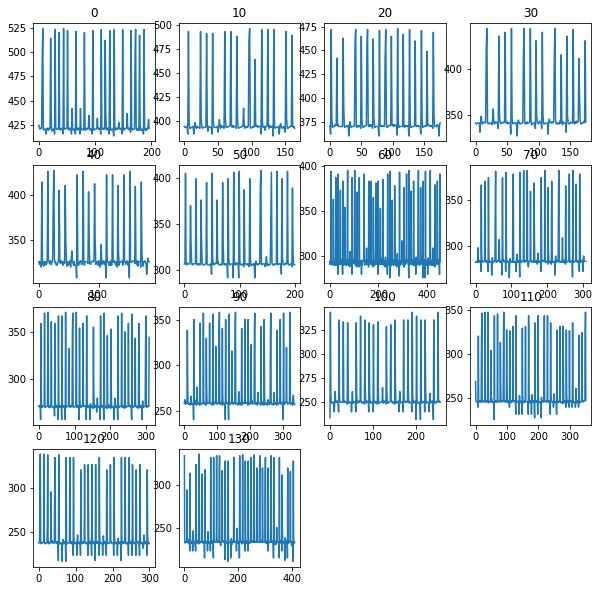

In [8]:
fig = plt.figure(figsize=(10, 10))

for i in range(14):
  fig.add_subplot(4, 4, i+1)
  plt.plot(s[i])
  plt.title(y[i])
plt.show()

In [4]:
x = [scipy.stats.trim_mean(ss, 0.2) for ss in s]
x

[421.38655462184875,
 393.54545454545456,
 370.5514018691589,
 342.2169811320755,
 325.4954954954955,
 306.8,
 293.52919708029196,
 283.10752688172045,
 270.241935483871,
 258.19607843137254,
 250.24516129032259,
 246.44811320754718,
 238.37222222222223,
 234.27822580645162]

array([ -0.67226318, 268.33149097])

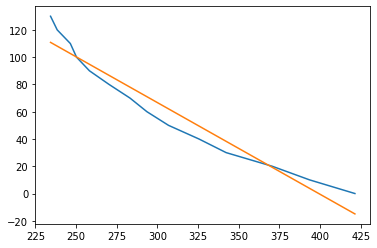

In [5]:
poly = np.polyfit(x, y, deg=1)
x_r = [1/xx for xx in x]

plt.plot(x, y)
plt.plot(x, np.polyval(poly, x))
poly

array([66192.08720431,  -161.4542475 ])

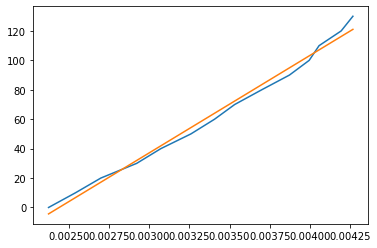

In [6]:
x_r = [1/xx for xx in x]
poly_r = np.polyfit(x_r, y, deg=1)

plt.plot(x_r, y)
plt.plot(x_r, np.polyval(poly_r, x_r))
poly_r

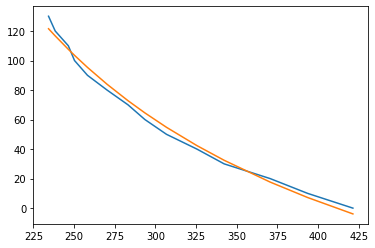

In [7]:
plt.plot(x, y)
plt.plot(x, [66192/x1-161 for x1 in x])